Source: https://www.youtube.com/watch?v=QIUxPv5PJOY&t=248s

In [65]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [66]:
#Obtain stocks data
df = web.DataReader('TSLA', data_source='yahoo', start='2012-01-01')
df

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500.0,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500.0,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500.0,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500.0,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000.0,5.450000
...,...,...,...,...,...,...
2021-07-26,668.200012,647.109985,650.969971,657.619995,25336600.0,657.619995
2021-07-27,666.500000,627.239990,663.400024,644.780029,32813300.0,644.780029
2021-07-28,654.969971,639.400024,647.000000,646.979980,16006600.0,646.979980


In [67]:
df.shape

(2410, 6)

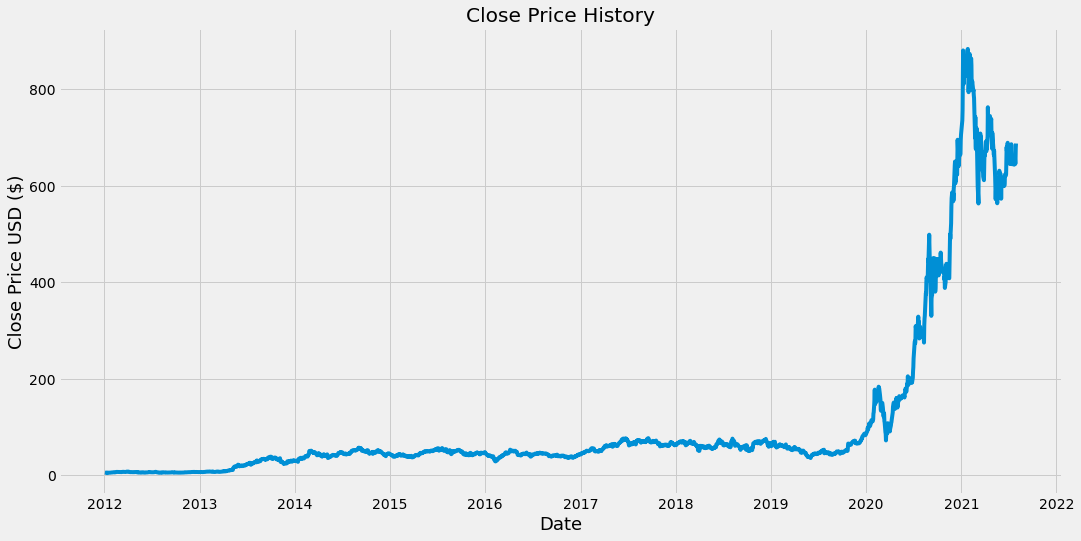

In [68]:
plt.figure(figsize=(16,8))
plt.title('Close Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.show()

In [69]:
#Obtain only close data
data = df.filter(['Close'])
dataset = data.values
train_len = math.ceil(len(dataset)*.8)
data

,Close
Date,
2012-01-03,5.616000
2012-01-04,5.542000
2012-01-05,5.424000
2012-01-06,5.382000
2012-01-09,5.450000
...,...
2021-07-26,657.619995
2021-07-27,644.780029
2021-07-28,646.979980


In [70]:
#Rescale data to fit to a 0 to 1 scale
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dataset)
scaled_data

array([[0.00120428],
       [0.00112005],
       [0.00098573],
       ...,
       [0.7312448 ],
       [0.76581383],
       [0.77702576]])

In [71]:
#Create training set
train = scaled_data[0:train_len, :]
x_train = []
y_train = []

#Create arrays containing close data of 60-day intervals
for i in range(60, len(train)):
    x_train.append(train[i-60:i, 0])
    y_train.append(train[i, 0])
    #if i<= 61:
    #    print(x_train)
    #    print(y_train)
    #    print()
x_train[0], y_train[0], x_train[1]

(array([0.00120428, 0.00112005, 0.00098573, 0.00093793, 0.00101533,
        0.00109956, 0.00123843, 0.00124298, 0.        , 0.00086736,
        0.00091516, 0.00090378, 0.00086736, 0.00090606, 0.00105403,
        0.00117924, 0.00140006, 0.00148885, 0.00154348, 0.00142966,
        0.00154576, 0.00169829, 0.00190317, 0.00205115, 0.00200562,
        0.00208074, 0.00222872, 0.00189179, 0.00198058, 0.00236303,
        0.00246092, 0.00259296, 0.00277281, 0.00266581, 0.00260207,
        0.00267264, 0.00249507, 0.00246548, 0.00250873, 0.00241767,
        0.00264532, 0.00256109, 0.00249962, 0.00234937, 0.00235165,
        0.00234027, 0.00272045, 0.00300957, 0.00302778, 0.00284566,
        0.00277964, 0.00285249, 0.00277508, 0.00277053, 0.00281378,
        0.00264305, 0.0025702 , 0.003326  , 0.00344893, 0.00342845]),
 0.0033100671390087323,
 array([0.00112005, 0.00098573, 0.00093793, 0.00101533, 0.00109956,
        0.00123843, 0.00124298, 0.        , 0.00086736, 0.00091516,
        0.00090378, 0.

In [72]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [73]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1868, 60, 1)

In [74]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(x_train.shape[1], 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [75]:
model.compile(optimizer='adam', loss='mean_squared_error')

In [76]:
model.fit(x_train, y_train, batch_size=1, epochs=1)

1868/1868 [==============================] - 25s 12ms/step - loss: 9.3693e-05


In [77]:
test_data = scaled_data[train_len-60: , :]
x_test = []
y_test = dataset[train_len:, :]
for i in range(60, len(test_data)):
    x_test.append(test_data[i-60:i, 0])

In [78]:
x_test = np.array(x_test)

In [79]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [80]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
print(predictions)
print(y_test)

[[ 53.82154 ]
 [ 54.0623  ]
 [ 54.205666]
 [ 54.502644]
 [ 54.7913  ]
 [ 55.150574]
 [ 55.597717]
 [ 56.32343 ]
 [ 57.078926]
 [ 57.75079 ]
 [ 58.249454]
 [ 58.656345]
 [ 58.941757]
 [ 59.21239 ]
 [ 59.300278]
 [ 59.303257]
 [ 58.822662]
 [ 58.288616]
 [ 58.126305]
 [ 58.1571  ]
 [ 58.25063 ]
 [ 58.45935 ]
 [ 58.664803]
 [ 58.59889 ]
 [ 58.365753]
 [ 58.228745]
 [ 58.21166 ]
 [ 58.36612 ]
 [ 58.594463]
 [ 58.91202 ]
 [ 59.4618  ]
 [ 60.090206]
 [ 60.735023]
 [ 61.37226 ]
 [ 61.813408]
 [ 62.024532]
 [ 62.149345]
 [ 62.19591 ]
 [ 63.30182 ]
 [ 65.51229 ]
 [ 68.0215  ]
 [ 70.12448 ]
 [ 71.76672 ]
 [ 72.99874 ]
 [ 73.85368 ]
 [ 74.530876]
 [ 75.041115]
 [ 75.64361 ]
 [ 76.44722 ]
 [ 77.30403 ]
 [ 78.29023 ]
 [ 79.35298 ]
 [ 80.24579 ]
 [ 81.03761 ]
 [ 81.76306 ]
 [ 82.324356]
 [ 82.97736 ]
 [ 83.427086]
 [ 83.7923  ]
 [ 83.54415 ]
 [ 83.1014  ]
 [ 82.42996 ]
 [ 81.77778 ]
 [ 81.17448 ]
 [ 80.78308 ]
 [ 80.57292 ]
 [ 80.39883 ]
 [ 80.19707 ]
 [ 80.13872 ]
 [ 80.24669 ]
 [ 80.65289 ]
 [ 81.

In [81]:
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

4.399565700673463

<ipython-input-82-51737fc7acac>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


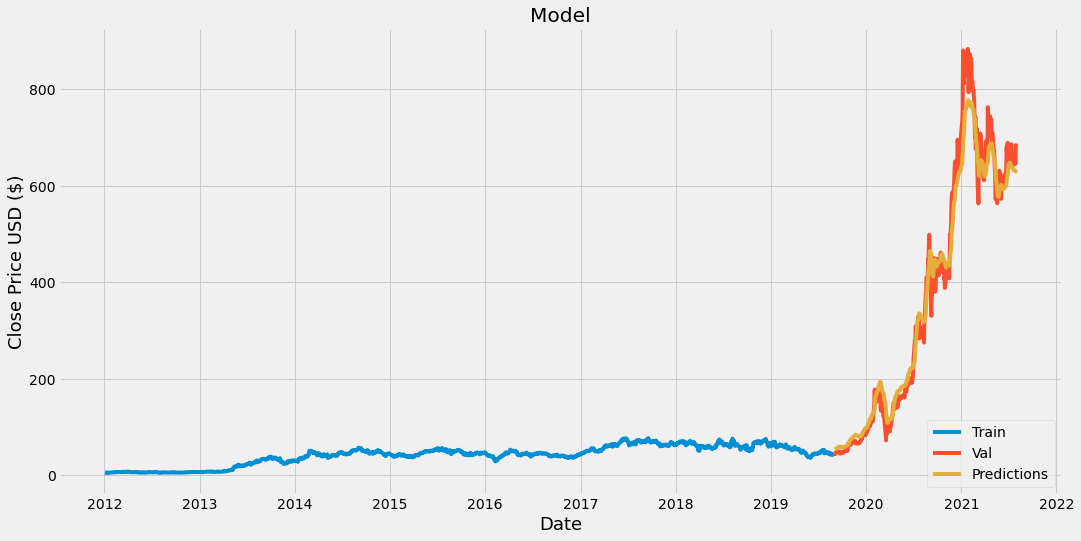

In [82]:
train1 = data[:train_len]
valid = data[train_len:]
valid['Predictions'] = predictions
plt.figure(figsize=(16, 8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD ($)', fontsize=18)
plt.plot(train1['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [83]:
valid

,Close,Predictions
Date,,
2019-09-03,45.001999,53.821541
2019-09-04,44.136002,54.062302
2019-09-05,45.916000,54.205666
2019-09-06,45.490002,54.502644
2019-09-09,46.358002,54.791302
...,...,...
2021-07-26,657.619995,630.509216
2021-07-27,644.780029,630.531555
2021-07-28,646.979980,629.811401


In [87]:
apple_quote = web.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end='2021-07-31')
new_df = apple_quote.filter(['Close'])
last_60_days = new_df[-60:].values
last_60_days_scaled = scaler.transform(last_60_days)
X_test = []
X_test.append(last_60_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[636.0358]]


What I've Gathered: This system takes in 60 day periods and predicts 1 day after these 60 days. We cannot predict more than a day past what we've input. However, we may be able to use only the predictions to perhaps see possible trends. This may be wildly inaccurate.